In [1]:
#Packages to be imported to complete data cleanup for this visual 

import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#Loaded cleaned file from sentiment analysis (tweets) and raw appended dataset (df)

tweets=pd.read_csv('Tweet_Text_Sentiment_data_FIXED 921_1.csv', engine='python')
df=pd.read_csv('TweetData.csv', engine='python')


In [3]:
#Uncleaned Dataset preview

df1=df[['text']]
df1.head(3)

,text
0,@ClayTravis FLU? This seems fishy to me these ...
1,@netflix omg!!! Ozark ending was to die for!!!...
2,Quem apoia a quarentena é quem tem a conta ban...


In [4]:
#Cleaned Dataset (used in this visual)

df2=tweets[['text']]
df2.head(3)

,text
0,flu seems fishy covid19 numbers dont add
1,omg ozark ending die thanks distraction covid1...
2,dont think gd leadership across states see gov...


In [5]:
#Split text in data to individual words and aggregated a count of each word to determine the most popular used words

s=(df2.text.str.split(expand=True).stack())
s.index = s.index.droplevel(-1)
df3=s.to_frame().reset_index()[[0]]
df3.rename(columns={0:'words'}, inplace=True)
df3['count']=1
grouped=df3.groupby(['words']).agg({'count':'sum'}).sort_values(['count'], ascending=False).reset_index()
grouped=grouped[grouped.words != 'amp'] 

In [6]:
top100=grouped.head(10000)
top100=top100['words'].astype(str).tolist()

mask = np.array(Image.open("usa.png"))
unique_string=(" ").join(top100)
wordcloud_usa = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(unique_string)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("img/us_wine.png", format="png")

plt.show()

<Figure size 1000x1000 with 1 Axes>

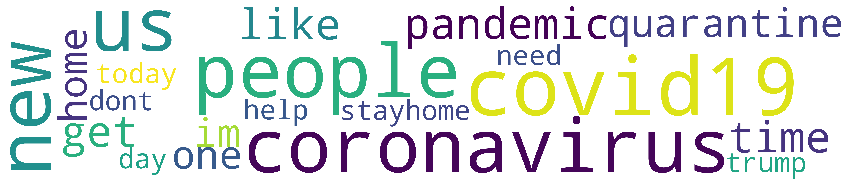

In [11]:
#Used top 21 words in this for the "top 20" as #covid19 was likely present in most all tweets and isnt a fair representation

top20=grouped.head(21)
top20=top20['words'].astype(str).tolist()

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#convert list to string and generate
stopwords = {word for word in STOPWORDS if word not in {'get', 'like', 'its'}}
unique_string=(" ").join(top20)
wordcloud = WordCloud(width = 7000, height = 1500, background_color='white', stopwords=stopwords, max_words=20).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [9]:
top20

['covid19',
 'coronavirus',
 'people',
 'us',
 'new',
 'pandemic',
 'get',
 'like',
 'time',
 'quarantine',
 'im',
 'one',
 'home',
 'stayhome',
 'need',
 'today',
 'day',
 'dont',
 'help',
 'trump',
 'its']

In [ ]:
#https://www.datacamp.com/community/tutorials/wordcloud-python